# Exploratory Data Analysis for NBA Moonshot Predictor

## Data Loading and Cleaning

Notes:
- Moon data is included for days there were no games.
- Some games do not have moon data, but there is moon data for that game date included in data.

In [1]:
import pandas as pd

df = pd.read_csv('data_pipeline/data/all_nba_moon_data.csv')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [3]:
df.head()

,player_id_game_id,season_year,player_id,player_name,nickname,team_id,team_abbreviation,team_name,game_id,game_date,matchup,wl,min,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,tov,stl,blk,blka,pf,pfd,pts,plus_minus,nba_fantasy_pts,dd2,td3,wnba_fantasy_pts,gp_rank,w_rank,l_rank,w_pct_rank,min_rank,fgm_rank,fga_rank,fg_pct_rank,fg3m_rank,fg3a_rank,fg3_pct_rank,ftm_rank,fta_rank,ft_pct_rank,oreb_rank,dreb_rank,reb_rank,ast_rank,tov_rank,stl_rank,blk_rank,blka_rank,pf_rank,pfd_rank,pts_rank,plus_minus_rank,nba_fantasy_pts_rank,dd2_rank,td3_rank,wnba_fantasy_pts_rank,available_flag,team_id_game_id,team_id_game_id.1,season_year.1,team_id.1,team_abbreviation.1,team_name.1,game_id.1,game_date.1,matchup.1,wl.1,min.1,fgm.1,fga.1,fg_pct.1,fg3m.1,fg3a.1,fg3_pct.1,ftm.1,fta.1,ft_pct.1,oreb.1,dreb.1,reb.1,ast.1,tov.1,stl.1,blk.1,blka.1,pf.1,pfd.1,pts.1,plus_minus.1,gp_rank.1,w_rank.1,l_rank.1,w_pct_rank.1,min_rank.1,fgm_rank.1,fga_rank.1,fg_pct_rank.1,fg3m_rank.1,fg3a_rank.1,fg3_pct_rank.1,ftm_rank.1,fta_rank.1,ft_pct_rank.1,oreb_rank.1,dreb_rank.1,reb_rank.1,ast_rank.1,tov_rank.1,stl_rank.1,blk_rank.1,blka_rank.1,pf_rank.1,pfd_rank.1,pts_rank.1,plus_minus_rank.1,available_flag.1,team_id.2,abbreviation,nickname.1,yearfounded,city,arena,arenacapacity,owner,generalmanager,headcoach,dleagueaffiliation,latitude,longitude,moon_event_id,date,latitude.1,longitude.1,body_id,body_name,distance_from_earth_au,distance_from_earth_km,horizontal_position_altitude_degrees,horizontal_position_azimuth_degrees,equatorial_position_right_ascension,equatorial_position_declination,position_constellation_name,elongation,magnitude,phase_string,game_id.2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-02T00:00:00.000-04:00_42.69694444_-83....,2021-01-02 00:00:00,42.696944,-83.245556,moon,Moon,0.00254,379313.55859,31.85,92.75,9.49,19.22,Leo,143.59431,-11.81080,Waning Gibbous,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-04T00:00:00.000-04:00_42.69694444_-83....,2021-01-04 00:00:00,42.696944,-83.245556,moon,Moon,0.00251,375939.38813,8.03,83.67,11.26,10.11,Leo,118.67261,-11.14989,Waning Gibbous,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-05T00:00:00.000-04:00_42.69694444_-83....,2021-01-05 00:00:00,42.696944,-83.245556,moon,Moon,0.00250,374685.19740,-3.75,79.82,12.11,4.58,Virgo,105.94349,-10.77215,Waning Gibbous,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [4]:
player_columns_to_keep = ['season_year', 'player_id', 'player_name', 'team_abbreviation', 'game_id', 'game_date', 'matchup', 'wl', 'min', 
                          'fgm', 'fga', 'fg_pct', 'fg3m', 'fg3a', 'fg3_pct', 'ftm', 'fta', 'ft_pct', 'oreb', 'dreb', 'reb', 'ast', 'tov',
                          'stl', 'blk', 'blka', 'pf', 'pfd', 'pts', 'plus_minus', 'nba_fantasy_pts', 'available_flag']

In [5]:
player_df = df.loc[:, player_columns_to_keep]
player_df = player_df.dropna(subset='player_id')

def extract_home_team(matchup):
    if 'vs.' in matchup:
        return matchup.split(' vs. ')[0]
    elif '@' in matchup:
        return matchup.split(' @ ')[1]
    else:
        return None

player_df['home_team'] = player_df['matchup'].apply(extract_home_team)
player_df['game_date'] = pd.to_datetime(player_df['game_date'])

player_df.head()

,season_year,player_id,player_name,team_abbreviation,game_id,game_date,matchup,wl,min,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,tov,stl,blk,blka,pf,pfd,pts,plus_minus,nba_fantasy_pts,available_flag,home_team
16,2020-21,1627788.0,Furkan Korkmaz,PHI,22000243.0,2021-01-23,PHI @ DET,W,13.076667,2.0,3.0,0.667,2.0,3.0,0.667,2.0,2.0,1.00,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0,-5.0,12.8,1.0,DET
17,2020-21,1629003.0,Shake Milton,PHI,22000243.0,2021-01-23,PHI @ DET,W,21.666667,3.0,9.0,0.333,1.0,2.0,0.500,1.0,1.0,1.00,2.0,1.0,3.0,3.0,2.0,0.0,0.0,2.0,3.0,1.0,8.0,-5.0,14.1,1.0,DET
18,2020-21,1626143.0,Jahlil Okafor,DET,22000243.0,2021-01-23,DET vs. PHI,L,9.166667,3.0,6.0,0.500,0.0,2.0,0.000,0.0,0.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,6.0,-8.0,7.5,1.0,DET
19,2020-21,1626153.0,Delon Wright,DET,22000243.0,2021-01-23,DET vs. PHI,L,35.683333,3.0,8.0,0.375,1.0,2.0,0.500,3.0,4.0,0.75,1.0,6.0,7.0,6.0,2.0,0.0,1.0,0.0,2.0,4.0,10.0,-6.0,28.4,1.0,DET
20,2020-21,1629680.0,Matisse Thybulle,PHI,22000243.0,2021-01-23,PHI @ DET,W,16.688333,0.0,3.0,0.000,0.0,2.0,0.000,0.0,0.0,0.00,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0,1.0,0.0,-14.0,1.7,1.0,DET


In [6]:
team_location_df = df.loc[:, ['abbreviation', 'latitude', 'longitude']]
team_location_df = team_location_df.dropna()
team_location_df = team_location_df.drop_duplicates()
team_location_df.shape

(30, 3)

In [7]:
clean_df = pd.merge(player_df, team_location_df, left_on='home_team', right_on='abbreviation', how='left')
clean_df = clean_df.drop(columns=['abbreviation'])
clean_df.head()

,season_year,player_id,player_name,team_abbreviation,game_id,game_date,matchup,wl,min,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,tov,stl,blk,blka,pf,pfd,pts,plus_minus,nba_fantasy_pts,available_flag,home_team,latitude,longitude
0,2020-21,1627788.0,Furkan Korkmaz,PHI,22000243.0,2021-01-23,PHI @ DET,W,13.076667,2.0,3.0,0.667,2.0,3.0,0.667,2.0,2.0,1.00,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0,-5.0,12.8,1.0,DET,42.696944,-83.245556
1,2020-21,1629003.0,Shake Milton,PHI,22000243.0,2021-01-23,PHI @ DET,W,21.666667,3.0,9.0,0.333,1.0,2.0,0.500,1.0,1.0,1.00,2.0,1.0,3.0,3.0,2.0,0.0,0.0,2.0,3.0,1.0,8.0,-5.0,14.1,1.0,DET,42.696944,-83.245556
2,2020-21,1626143.0,Jahlil Okafor,DET,22000243.0,2021-01-23,DET vs. PHI,L,9.166667,3.0,6.0,0.500,0.0,2.0,0.000,0.0,0.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,6.0,-8.0,7.5,1.0,DET,42.696944,-83.245556
3,2020-21,1626153.0,Delon Wright,DET,22000243.0,2021-01-23,DET vs. PHI,L,35.683333,3.0,8.0,0.375,1.0,2.0,0.500,3.0,4.0,0.75,1.0,6.0,7.0,6.0,2.0,0.0,1.0,0.0,2.0,4.0,10.0,-6.0,28.4,1.0,DET,42.696944,-83.245556
4,2020-21,1629680.0,Matisse Thybulle,PHI,22000243.0,2021-01-23,PHI @ DET,W,16.688333,0.0,3.0,0.000,0.0,2.0,0.000,0.0,0.0,0.00,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0,1.0,0.0,-14.0,1.7,1.0,DET,42.696944,-83.245556


In [8]:
moon_columns_to_keep = ['date', 'latitude.1', 'longitude.1', 'distance_from_earth_au', 'distance_from_earth_km', 'horizontal_position_altitude_degrees',
                        'horizontal_position_azimuth_degrees', 'equatorial_position_right_ascension', 'equatorial_position_declination',
                        'position_constellation_name', 'elongation', 'magnitude', 'phase_string']

In [9]:
moon_data_df = df.loc[:, moon_columns_to_keep]
moon_data_df = moon_data_df.dropna()
moon_data_df = moon_data_df.drop_duplicates()
moon_data_df['date'] = pd.to_datetime(moon_data_df['date'])
moon_data_df.head()

,date,latitude.1,longitude.1,distance_from_earth_au,distance_from_earth_km,horizontal_position_altitude_degrees,horizontal_position_azimuth_degrees,equatorial_position_right_ascension,equatorial_position_declination,position_constellation_name,elongation,magnitude,phase_string
0,2021-01-02,42.696944,-83.245556,0.00254,379313.55859,31.85,92.75,9.49,19.22,Leo,143.59431,-11.81080,Waning Gibbous
1,2021-01-04,42.696944,-83.245556,0.00251,375939.38813,8.03,83.67,11.26,10.11,Leo,118.67261,-11.14989,Waning Gibbous
2,2021-01-05,42.696944,-83.245556,0.00250,374685.19740,-3.75,79.82,12.11,4.58,Virgo,105.94349,-10.77215,Waning Gibbous
3,2021-01-06,42.696944,-83.245556,0.00250,373677.82466,-16.24,75.84,12.95,-1.24,Virgo,93.04411,-10.34404,Waning Gibbous
4,2021-01-07,42.696944,-83.245556,0.00249,372936.58046,-28.76,71.26,13.80,-7.06,Virgo,79.98326,-9.84657,Waning Crescent


In [10]:
final_df = pd.merge(clean_df, moon_data_df, left_on=['game_date', 'latitude', 'longitude'],
                    right_on=['date', 'latitude.1', 'longitude.1'], how='left')
final_df = final_df.drop(columns=['date', 'latitude.1', 'longitude.1'])
final_df.head()

,season_year,player_id,player_name,team_abbreviation,game_id,game_date,matchup,wl,min,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,tov,stl,blk,blka,pf,pfd,pts,plus_minus,nba_fantasy_pts,available_flag,home_team,latitude,longitude,distance_from_earth_au,distance_from_earth_km,horizontal_position_altitude_degrees,horizontal_position_azimuth_degrees,equatorial_position_right_ascension,equatorial_position_declination,position_constellation_name,elongation,magnitude,phase_string
0,2020-21,1627788.0,Furkan Korkmaz,PHI,22000243.0,2021-01-23,PHI @ DET,W,13.076667,2.0,3.0,0.667,2.0,3.0,0.667,2.0,2.0,1.00,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0,-5.0,12.8,1.0,DET,42.696944,-83.245556,0.00266,398119.52163,45.36,249.4,3.7,17.43,Taurus,114.7761,-10.88707,Waxing Gibbous
1,2020-21,1629003.0,Shake Milton,PHI,22000243.0,2021-01-23,PHI @ DET,W,21.666667,3.0,9.0,0.333,1.0,2.0,0.500,1.0,1.0,1.00,2.0,1.0,3.0,3.0,2.0,0.0,0.0,2.0,3.0,1.0,8.0,-5.0,14.1,1.0,DET,42.696944,-83.245556,0.00266,398119.52163,45.36,249.4,3.7,17.43,Taurus,114.7761,-10.88707,Waxing Gibbous
2,2020-21,1626143.0,Jahlil Okafor,DET,22000243.0,2021-01-23,DET vs. PHI,L,9.166667,3.0,6.0,0.500,0.0,2.0,0.000,0.0,0.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,6.0,-8.0,7.5,1.0,DET,42.696944,-83.245556,0.00266,398119.52163,45.36,249.4,3.7,17.43,Taurus,114.7761,-10.88707,Waxing Gibbous
3,2020-21,1626153.0,Delon Wright,DET,22000243.0,2021-01-23,DET vs. PHI,L,35.683333,3.0,8.0,0.375,1.0,2.0,0.500,3.0,4.0,0.75,1.0,6.0,7.0,6.0,2.0,0.0,1.0,0.0,2.0,4.0,10.0,-6.0,28.4,1.0,DET,42.696944,-83.245556,0.00266,398119.52163,45.36,249.4,3.7,17.43,Taurus,114.7761,-10.88707,Waxing Gibbous
4,2020-21,1629680.0,Matisse Thybulle,PHI,22000243.0,2021-01-23,PHI @ DET,W,16.688333,0.0,3.0,0.000,0.0,2.0,0.000,0.0,0.0,0.00,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0,1.0,0.0,-14.0,1.7,1.0,DET,42.696944,-83.245556,0.00266,398119.52163,45.36,249.4,3.7,17.43,Taurus,114.7761,-10.88707,Waxing Gibbous


In [11]:
final_df.to_csv('data_pipeline/data/clean_nba_moon_data.csv', index=False)

Notes:
- Dropped known, irrelevant columns.
- Rejoined game data and moon data to fix missing joins.

## EDA

In [12]:
final_df.shape

(123481, 45)

In [13]:
final_df.isnull().sum().sum()

0

In [14]:
final_df.describe()

,player_id,game_id,game_date,min,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,tov,stl,blk,blka,pf,pfd,pts,plus_minus,nba_fantasy_pts,available_flag,latitude,longitude,distance_from_earth_au,distance_from_earth_km,horizontal_position_altitude_degrees,horizontal_position_azimuth_degrees,equatorial_position_right_ascension,equatorial_position_declination,elongation,magnitude
count,1.234810e+05,1.234810e+05,123481,123481.000000,123481.000000,123481.000000,123481.000000,123481.000000,123481.000000,123481.000000,123481.000000,123481.000000,123481.000000,123481.000000,123481.000000,123481.000000,123481.000000,123481.000000,123481.000000,123481.000000,123481.000000,123481.000000,123481.000000,123481.000000,123481.000000,123481.000000,123481.000000,123481.000000,123481.000000,123481.000000,123481.000000,123481.000000,123481.000000,123481.000000,123481.000000,123481.000000,123481.000000
mean,1.071345e+06,2.200320e+07,2021-01-31 19:59:58.017508608,22.810149,3.885796,8.361602,0.433184,1.151602,3.211142,0.257300,1.659162,2.142006,0.430476,0.964659,3.229963,4.194621,2.337396,1.267312,0.712984,0.454564,0.454572,1.899491,1.899474,10.582357,0.000000,21.357328,1.003013,37.340049,-93.405501,0.002580,386013.230015,1.062756,183.239952,11.472920,0.782785,90.246847,-9.577067
min,1.713000e+03,2.180000e+07,2018-10-16 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-56.000000,-3.300000,1.000000,25.781389,-122.666667,0.002350,351663.527060,-88.170000,0.010000,0.000000,-28.190000,0.419930,-12.896020
25%,2.033820e+05,2.190022e+07,2019-11-23 00:00:00,15.366667,1.000000,4.000000,0.286000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,-7.000000,10.100000,1.000000,33.757222,-105.007500,0.002500,373341.938030,-39.000000,90.620000,5.050000,-16.130000,45.617770,-11.533580
50%,1.627767e+06,2.200062e+07,2021-03-21 00:00:00,23.723333,3.000000,7.000000,0.444000,1.000000,3.000000,0.200000,1.000000,2.000000,0.500000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,9.000000,0.000000,19.400000,1.000000,38.898056,-90.050556,0.002590,387650.100870,1.850000,193.440000,11.270000,1.500000,89.973170,-10.116230
75%,1.629067e+06,2.210099e+07,2022-03-09 00:00:00,31.291667,6.000000,12.000000,0.579000,2.000000,5.000000,0.500000,2.000000,3.000000,1.000000,1.000000,5.000000,6.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,3.000000,15.000000,7.000000,30.400000,1.000000,41.496389,-80.839167,0.002670,399038.870920,40.170000,272.240000,17.630000,17.570000,135.531240,-7.946190
max,1.641645e+06,2.220123e+07,2023-04-09 00:00:00,56.516667,22.000000,41.000000,1.000000,14.000000,24.000000,1.000000,26.000000,28.000000,1.000000,14.000000,23.000000,30.000000,24.000000,12.000000,10.000000,10.000000,8.000000,6.000000,19.000000,71.000000,54.000000,105.200000,2.000000,45.531667,-71.062228,0.002760,412648.078340,87.960000,359.820000,24.000000,27.630000,179.604570,-3.934410
std,7.008024e+05,1.440864e+05,NaN,10.524212,3.195300,5.922200,0.249483,1.463441,2.993456,0.291444,2.322849,2.800916,0.433630,1.346045,2.757421,3.481264,2.568633,1.400682,0.951049,0.818138,0.752501,1.475476,2.043234,8.646258,11.260086,14.533569,0.054805,5.194512,15.923285,0.000099,14829.735961,44.625705,98.104294,7.140376,17.369529,51.716559,2.350931


In [15]:
final_df['available_flag'].value_counts()

available_flag
1.0    123109
2.0       372
Name: count, dtype: int64

In [16]:
final_df[final_df['min'] == 0]

,season_year,player_id,player_name,team_abbreviation,game_id,game_date,matchup,wl,min,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,tov,stl,blk,blka,pf,pfd,pts,plus_minus,nba_fantasy_pts,available_flag,home_team,latitude,longitude,distance_from_earth_au,distance_from_earth_km,horizontal_position_altitude_degrees,horizontal_position_azimuth_degrees,equatorial_position_right_ascension,equatorial_position_declination,position_constellation_name,elongation,magnitude,phase_string
20331,2022-23,1626195.0,Willy Hernangomez,NOP,22200798.0,2023-02-04,NOP vs. LAL,W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NOP,29.948889,-90.081944,0.00267,400106.70769,84.90,155.76,8.07,25.34,Cancer,162.34512,-12.16642,Waxing Gibbous
23633,2018-19,1629020.0,Jarred Vanderbilt,DEN,21801052.0,2019-03-18,DEN @ BOS,W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,BOS,42.366303,-71.062228,0.00238,356316.33815,56.99,228.12,9.26,17.31,Cancer,139.21153,-11.78985,Waxing Gibbous
29371,2018-19,1626168.0,Trey Lyles,DEN,21801040.0,2019-03-16,DEN vs. IND,W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,DEN,39.748611,-105.007500,0.00244,364397.11481,44.56,260.85,7.28,21.22,Gemini,113.33043,-11.01048,Waxing Gibbous
35165,2021-22,1626195.0,Willy Hernangomez,NOP,22100074.0,2021-10-29,NOP vs. SAC,L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NOP,29.948889,-90.081944,0.00264,394861.24536,-6.21,59.92,8.97,21.91,Cancer,85.77248,-9.92143,Waning Crescent
62013,2018-19,1626246.0,Boban Marjanovic,LAC,21800796.0,2019-02-05,LAC @ CHA,W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,CHA,35.225000,-80.839167,0.00275,412009.77591,-59.31,298.89,21.44,-17.36,Capricornus,3.70894,-4.18895,Waxing Crescent
67835,2021-22,1629626.0,Bol Bol,DEN,22100151.0,2021-11-08,DEN vs. MIA,W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,DEN,39.748611,-105.007500,0.00246,367361.94446,-38.67,265.75,18.15,-26.55,Sagittarius,47.04509,-8.16508,Waxing Crescent
99418,2019-20,1629713.0,Justin James,SAC,21900464.0,2019-12-26,SAC vs. MIN,L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,SAC,38.649167,-121.518056,0.00261,390438.86576,-68.56,311.12,18.33,-23.31,Sagittarius,0.95244,-3.99489,Waxing Crescent
112755,2022-23,201959.0,Taj Gibson,WAS,22200793.0,2023-02-04,WAS @ BKN,L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,BKN,40.682650,-73.974689,0.00268,400303.90700,74.51,177.67,8.03,25.27,Cancer,161.91290,-12.15523,Waxing Gibbous
114508,2021-22,1626246.0,Boban Marjanovic,DAL,22100954.0,2022-03-05,DAL vs. SAC,W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,DAL,32.790556,-96.810278,0.00260,389209.23143,-27.66,293.95,0.98,2.51,Cetus,31.11029,-6.90113,Waxing Crescent


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
final_df.head()

,season_year,player_id,player_name,team_abbreviation,game_id,game_date,matchup,wl,min,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,tov,stl,blk,blka,pf,pfd,pts,plus_minus,nba_fantasy_pts,available_flag,home_team,latitude,longitude,distance_from_earth_au,distance_from_earth_km,horizontal_position_altitude_degrees,horizontal_position_azimuth_degrees,equatorial_position_right_ascension,equatorial_position_declination,position_constellation_name,elongation,magnitude,phase_string
0,2020-21,1627788.0,Furkan Korkmaz,PHI,22000243.0,2021-01-23,PHI @ DET,W,13.076667,2.0,3.0,0.667,2.0,3.0,0.667,2.0,2.0,1.00,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0,-5.0,12.8,1.0,DET,42.696944,-83.245556,0.00266,398119.52163,45.36,249.4,3.7,17.43,Taurus,114.7761,-10.88707,Waxing Gibbous
1,2020-21,1629003.0,Shake Milton,PHI,22000243.0,2021-01-23,PHI @ DET,W,21.666667,3.0,9.0,0.333,1.0,2.0,0.500,1.0,1.0,1.00,2.0,1.0,3.0,3.0,2.0,0.0,0.0,2.0,3.0,1.0,8.0,-5.0,14.1,1.0,DET,42.696944,-83.245556,0.00266,398119.52163,45.36,249.4,3.7,17.43,Taurus,114.7761,-10.88707,Waxing Gibbous
2,2020-21,1626143.0,Jahlil Okafor,DET,22000243.0,2021-01-23,DET vs. PHI,L,9.166667,3.0,6.0,0.500,0.0,2.0,0.000,0.0,0.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,6.0,-8.0,7.5,1.0,DET,42.696944,-83.245556,0.00266,398119.52163,45.36,249.4,3.7,17.43,Taurus,114.7761,-10.88707,Waxing Gibbous
3,2020-21,1626153.0,Delon Wright,DET,22000243.0,2021-01-23,DET vs. PHI,L,35.683333,3.0,8.0,0.375,1.0,2.0,0.500,3.0,4.0,0.75,1.0,6.0,7.0,6.0,2.0,0.0,1.0,0.0,2.0,4.0,10.0,-6.0,28.4,1.0,DET,42.696944,-83.245556,0.00266,398119.52163,45.36,249.4,3.7,17.43,Taurus,114.7761,-10.88707,Waxing Gibbous
4,2020-21,1629680.0,Matisse Thybulle,PHI,22000243.0,2021-01-23,PHI @ DET,W,16.688333,0.0,3.0,0.000,0.0,2.0,0.000,0.0,0.0,0.00,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0,1.0,0.0,-14.0,1.7,1.0,DET,42.696944,-83.245556,0.00266,398119.52163,45.36,249.4,3.7,17.43,Taurus,114.7761,-10.88707,Waxing Gibbous


In [19]:
column_abbreviations = {
    'distance_from_earth_au': 'dist_earth_au',
    'distance_from_earth_km': 'dist_earth_km',
    'horizontal_position_altitude_degrees': 'horiz_pos_alt',
    'horizontal_position_azimuth_degrees': 'horiz_pos_azi',
    'equatorial_position_right_ascension': 'equat_pos_asc',
    'equatorial_position_declination': 'equat_pos_dec',
    'position_constellation_name': 'constellation',
    'phase_string': 'phase'
}

final_df = final_df.rename(columns=column_abbreviations)

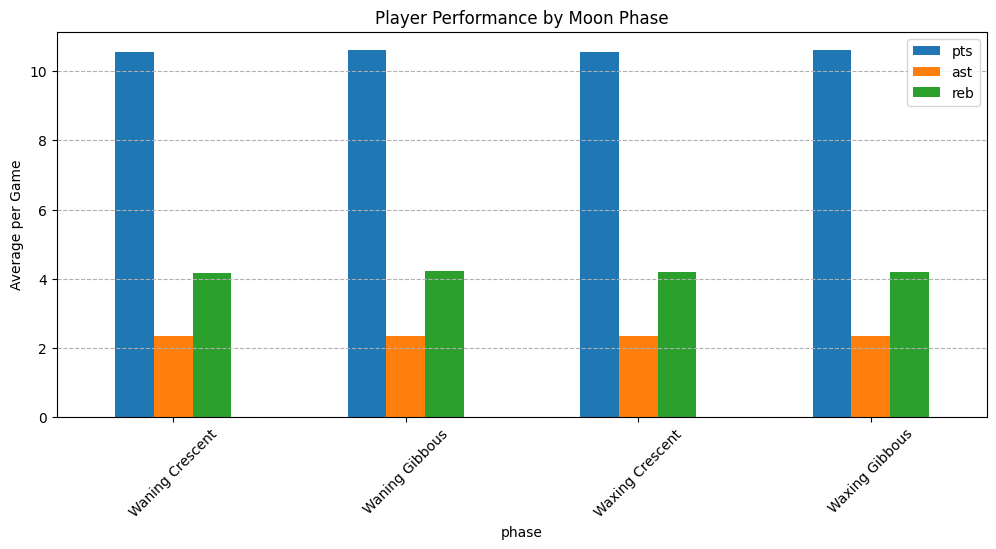

In [20]:
performance_by_moon_phase = final_df.groupby('phase')[['pts', 'ast', 'reb']].mean().reset_index()

plt.figure(figsize=(12, 5))
performance_by_moon_phase.plot(x='phase', kind='bar', stacked=False, ax=plt.gca())
plt.title('Player Performance by Moon Phase')
plt.ylabel('Average per Game')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

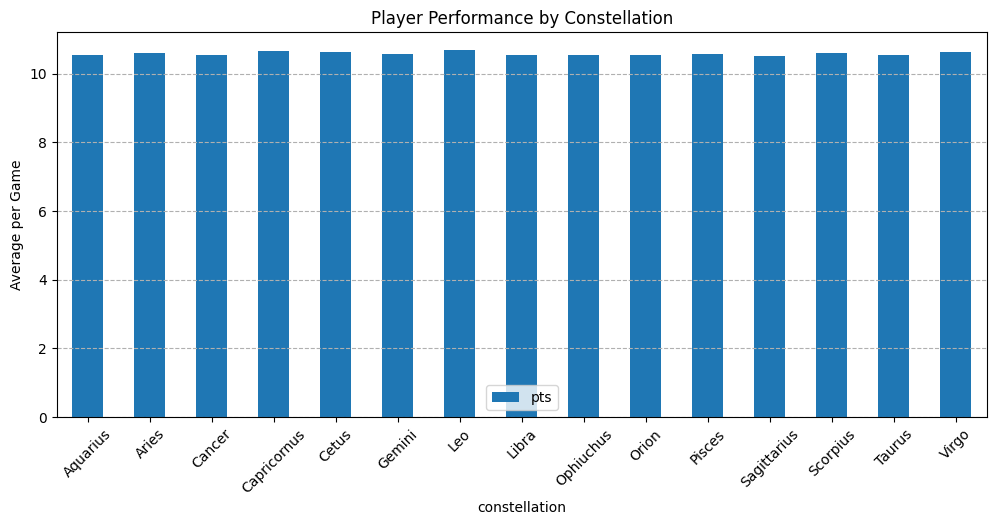

In [21]:
performance_by_constellation = final_df.groupby('constellation')[['pts']].mean().reset_index()

plt.figure(figsize=(12, 5))
performance_by_constellation.plot(x='constellation', kind='bar', stacked=False, ax=plt.gca())
plt.title('Player Performance by Constellation')
plt.ylabel('Average per Game')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

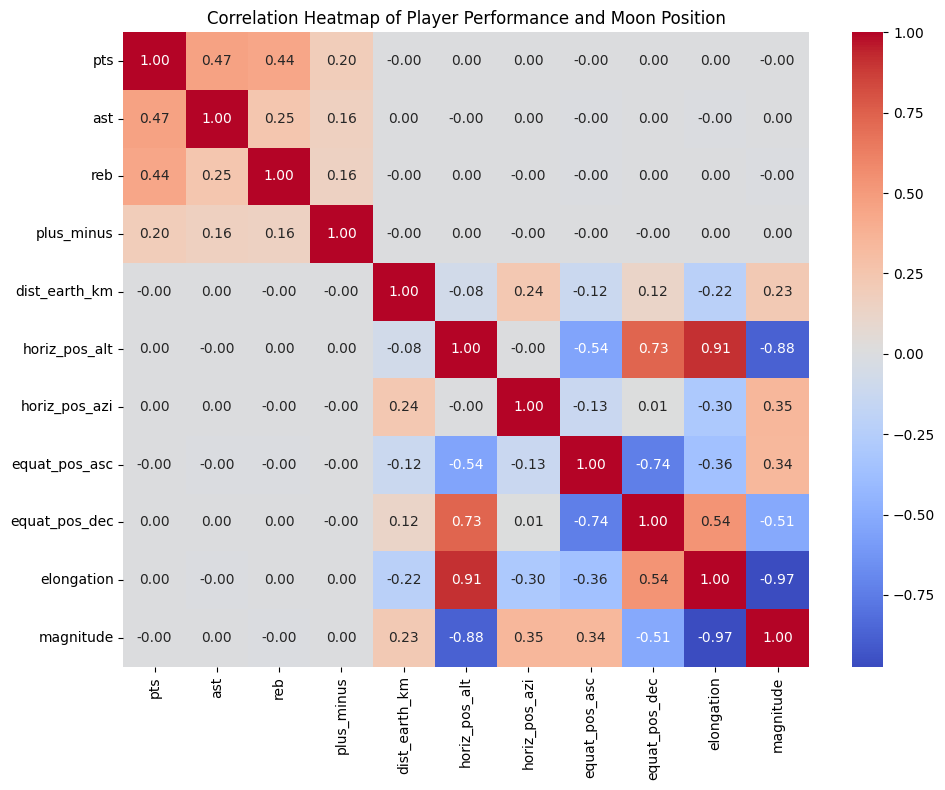

In [35]:
cols_for_correlation = ['pts', 'ast', 'reb', 'plus_minus', 'dist_earth_km', 'horiz_pos_alt', 'horiz_pos_azi', 
                       'equat_pos_asc', 'equat_pos_dec', 'elongation', 'magnitude']
correlation_matrix = final_df[cols_for_correlation].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Player Performance and Moon Position')

plt.tight_layout()
plt.show()

In [41]:
def plot_performance_by_constellation(player_name):

    individual_players_df = final_df[final_df['player_name'] == player_name]

    performance_by_constellation_and_season = individual_players_df.groupby(['season_year', 'constellation'])[['pts']].mean().reset_index()

    overall_avg_pts_by_season = individual_players_df.groupby('season_year')['pts'].mean().reset_index()

    seasons = performance_by_constellation_and_season['season_year'].unique()
    n_seasons = len(seasons)
    fig, axes = plt.subplots(n_seasons, 1, figsize=(12, 5 * n_seasons))

    for i, season in enumerate(seasons):
        ax = axes[i] if n_seasons > 1 else axes
        season_data = performance_by_constellation_and_season[performance_by_constellation_and_season['season_year'] == season]
        overall_avg = overall_avg_pts_by_season[overall_avg_pts_by_season['season_year'] == season]['pts'].values[0]
        
        season_data.plot(x='constellation', y='pts', kind='bar', stacked=False, ax=ax, legend=None)
        ax.set_title(f"{player_name}'s Performance by Constellation in {season}")
        ax.set_ylabel('Average Points per Game')
        ax.set_xticklabels(season_data['constellation'], rotation=45)
        ax.grid(axis='y', linestyle='--')

        ax.axhline(y=overall_avg, color='r', linestyle='-', linewidth=2, label='Overall Average')
        ax.legend()

    plt.tight_layout()
    plt.show()

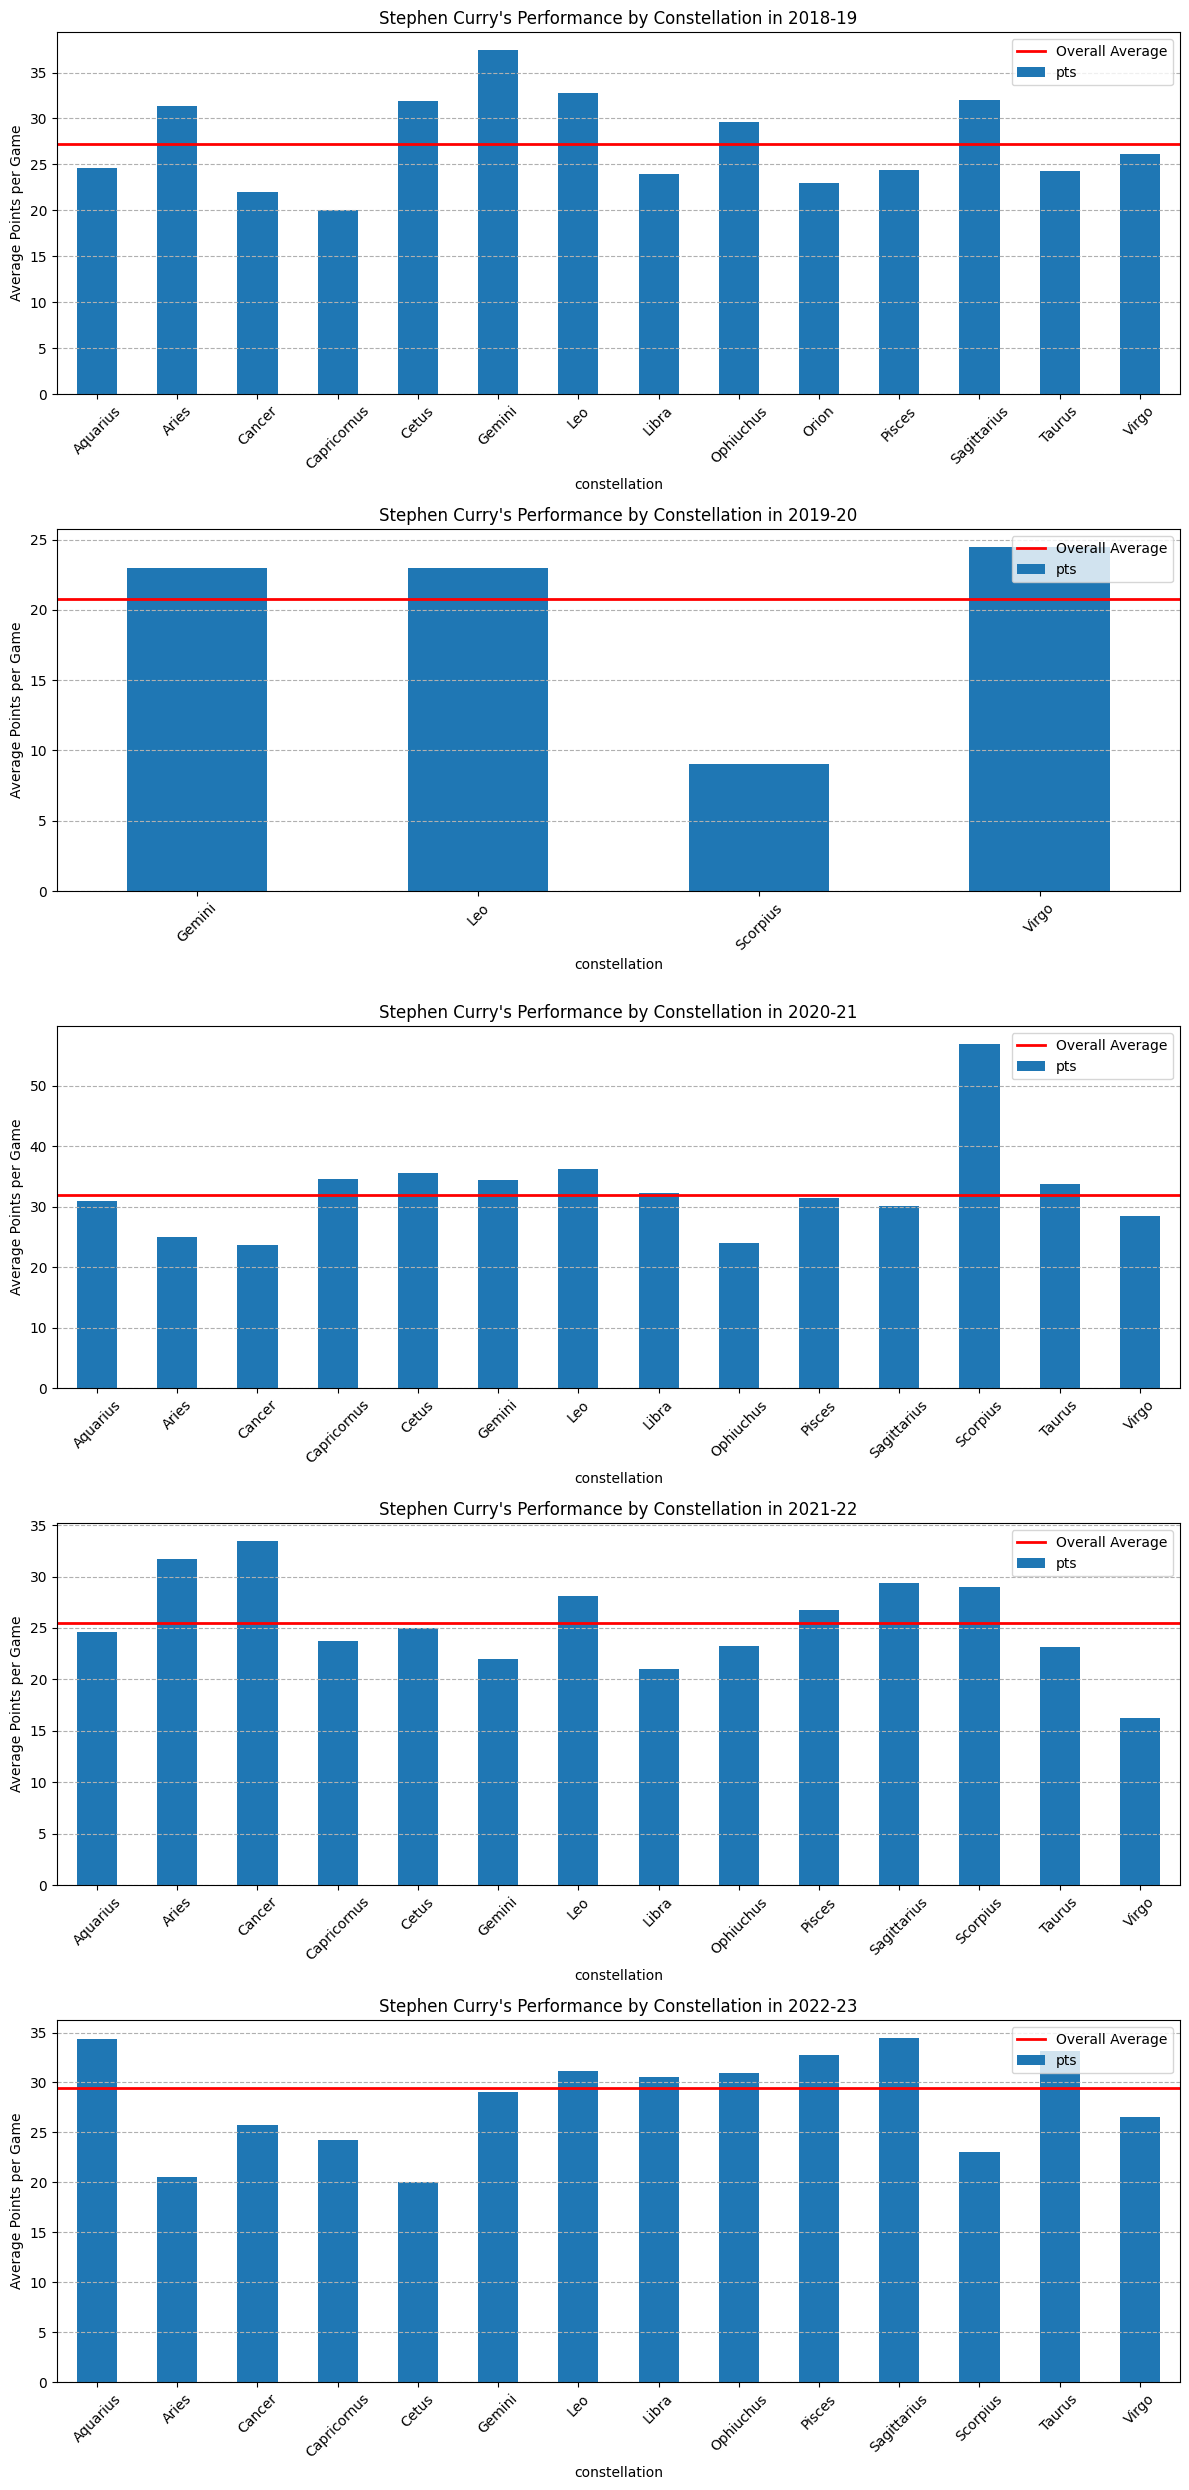

In [42]:
plot_performance_by_constellation('Stephen Curry')

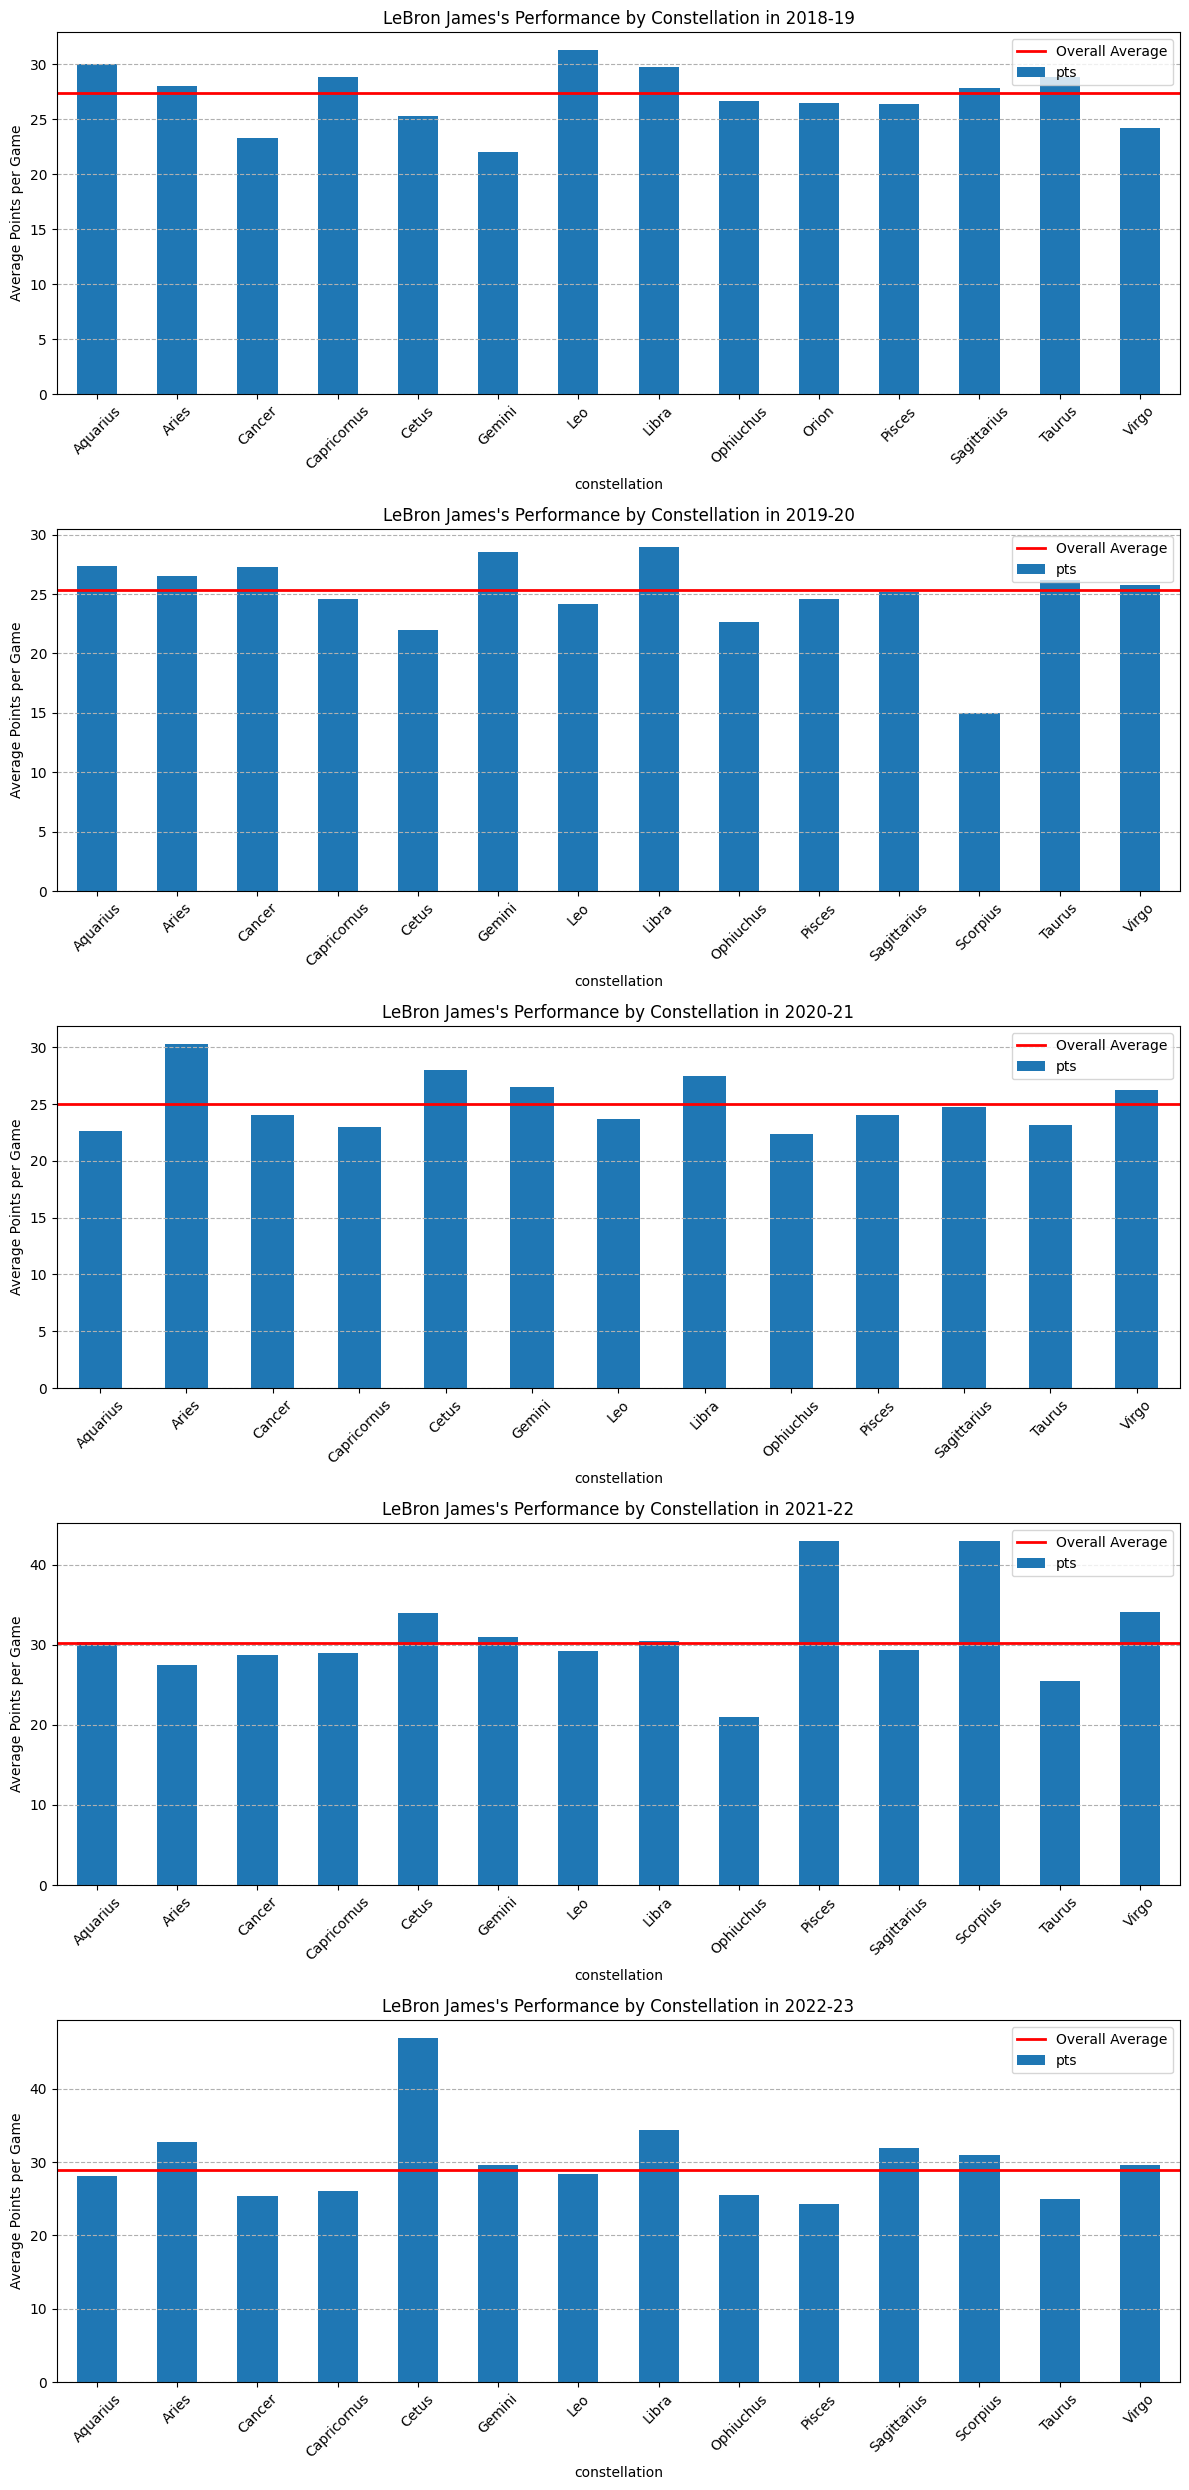

In [43]:
plot_performance_by_constellation('LeBron James')

Notes:
- When looking at the data as a whole, there isn't any notable correlations, but there may be further opportunity when looking at individual players.